## Implementation of Vision Transformer from Scratch for MNIST Classification
- Author : Lim Jing Bin
- Email : limjingbin98@gmail.com
- Project Description : The implementation of the Vision Transformer for MNIST classification uses an image size of 224 x 224 x 3, with a patch size of 16 x 16, a hidden size (latent vector) of 128, 12 attention heads, and 12 transformer layers. The model is trained using the Adam optimizer with a learning rate of 1e-3, weight decay of 1e-5, and a batch size of 32 for 20 epochs. The resulting test accuracy is 95.86%, with a loss of 0.1337.

1. Image Size : 224 x 224 x 3
2. Patch Size : 16 x 16
3. Hidden Size : 128
4. Number of attention heads : 12
5. Number of transformer layers : 12

While Convolutional Neural Networks (CNNs) have been proven to achieve high accuracy on the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits, it is worth noting that Vision Transformers have shown impressive performance on other image classification tasks, particularly on large-scale datasets where they have outperformed traditional CNNs. Therefore, while it is unlikely that Vision Transformers will significantly outperform CNNs on MNIST due to the dataset's simplicity and small size, it's still an interesting approach to explore.


In [1]:
!pip install -U tensorflow-addons

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [2]:
num_classes = 10
input_shape = (28, 28, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test  = tf.expand_dims(x_test, axis=3, name= None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test  = tf.repeat(x_test,3, axis=3, name=None)
# One-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train)
y_test  = tf.keras.utils.to_categorical(y_test)
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 3) - y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 3) - y_test shape: (10000, 10)


In [3]:
learning_rate = 1e-3
weight_decay = 1e-5
batch_size = 32
num_epochs = 20
image_size = 224
patch_size = 16 # Size of the patches to be extracted from the input images
num_patches = (image_size // patch_size) **2
projection_dim = 128
num_heads = 12
transformer_units = [ 4*projection_dim,
                      projection_dim,
                     ] # Size of the tranformer layers

transformer_layers = 12

In [4]:
data_augmentation = tf.keras.Sequential(
    [   layers.Resizing(image_size, image_size),
        layers.RandomRotation(10),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2),
        layers.Rescaling(1./255),
       
        
    ],
    name="data_augmentation",
)

In [5]:
def mlp(x, hidden_units, dropout_rate = 0.1):
    for units in hidden_units:
        x = tf.keras.layers.Dense(units, activation = tf.nn.gelu)(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
    return x

In [6]:
y = mlp(tf.zeros((1, 197, 768)),[768], 0.1)
y

<tf.Tensor: shape=(1, 197, 768), dtype=float32, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)>

In [7]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        
        patch_dims = patches.shape[-1]
        
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        
        return patches

image.shape = (28, 28, 3)
Image size: 224 X 224
Patch size: 16 X 16
Patches per image: 196
Elements per patch: 768
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (16, 16, 3)
patch_image.shape = (

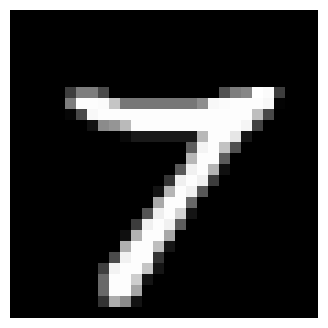

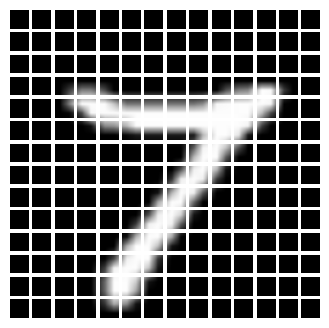

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
print(f"image.shape = {image.shape}")
plt.imshow(image)
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    print(f"patch_image.shape = {np.array(patch_img).shape}")
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [9]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder,self).__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units = projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(input_dim = num_patches+1, output_dim = projection_dim)
    
    def call(self,patch):
        positions = tf.range(start=0, limit = self.num_patches+1, delta = 1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [10]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches=196, projection_dim=768):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection_dim = projection_dim
        w_init = tf.random_normal_initializer()
        class_token = w_init(shape=(1, projection_dim), dtype="float32")
        self.class_token = tf.Variable(initial_value=class_token, trainable=True)
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(input_dim=num_patches+1, output_dim=projection_dim)

    def call(self, patch):
        batch = tf.shape(patch)[0]
        # reshape the class token embedins
        class_token = tf.tile(self.class_token, multiples = [batch, 1])
        class_token = tf.reshape(class_token, (batch, 1, self.projection_dim))
        # calculate patches embeddings
        patches_embed = self.projection(patch)
        patches_embed = tf.concat([patches_embed, class_token], 1)
        # calcualte positional embeddings
        positions = tf.range(start=0, limit=self.num_patches+1, delta=1)
        positions_embed = self.position_embedding(positions)
        # add both embeddings
        encoded = patches_embed + positions_embed
        return encoded

In [11]:
patch_encoder = PatchEncoder(num_patches, projection_dim)
encoded = patch_encoder(patches)
encoded.shape

TensorShape([1, 197, 128])

In [12]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP. (No representation layers needed)
    ##features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes,activation="softmax")( representation )
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    model.summary()
    return model

In [13]:
model = create_vit_classifier()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 224, 224, 3)  0          ['input_1[0][0]']                
                                                                                                  
 patches_1 (Patches)            (None, None, 768)    0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder_1 (PatchEncoder)  (None, 197, 128)    123776      ['patches_1[0][0]']              
                                                                                              

In [14]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=[
            keras.metrics.CategoricalAccuracy(name="accuracy")
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.001, mode="max")
    
    logger = tf.keras.callbacks.TensorBoard( 
        log_dir=f'logs/ViTb16-224x224',
        histogram_freq=5,
        write_graph=True,
        write_images=True,
        write_steps_per_second=True,
        update_freq='epoch',
        profile_batch=0,
        embeddings_freq=0,
        embeddings_metadata=True)

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback,logger,reduce_lr],
    )

    model.load_weights(checkpoint_filepath)
    loss, accuracy = model.evaluate(x_test, y_test)    
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test loss : {loss}")
    print("Save Model and Weight to Disk")
    model.save("ViT_224x224.tf")
    model.save_weights("ViT_224x224_weights.h5")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 224, 224, 3)  0          ['input_2[0][0]']                
                                                                                                  
 patches_2 (Patches)            (None, None, 768)    0           ['data_augmentation[1][0]']      
                                                                                                  
 patch_encoder_2 (PatchEncoder)  (None, 197, 128)    123776      ['patches_2[0][0]']              
                                                                                            

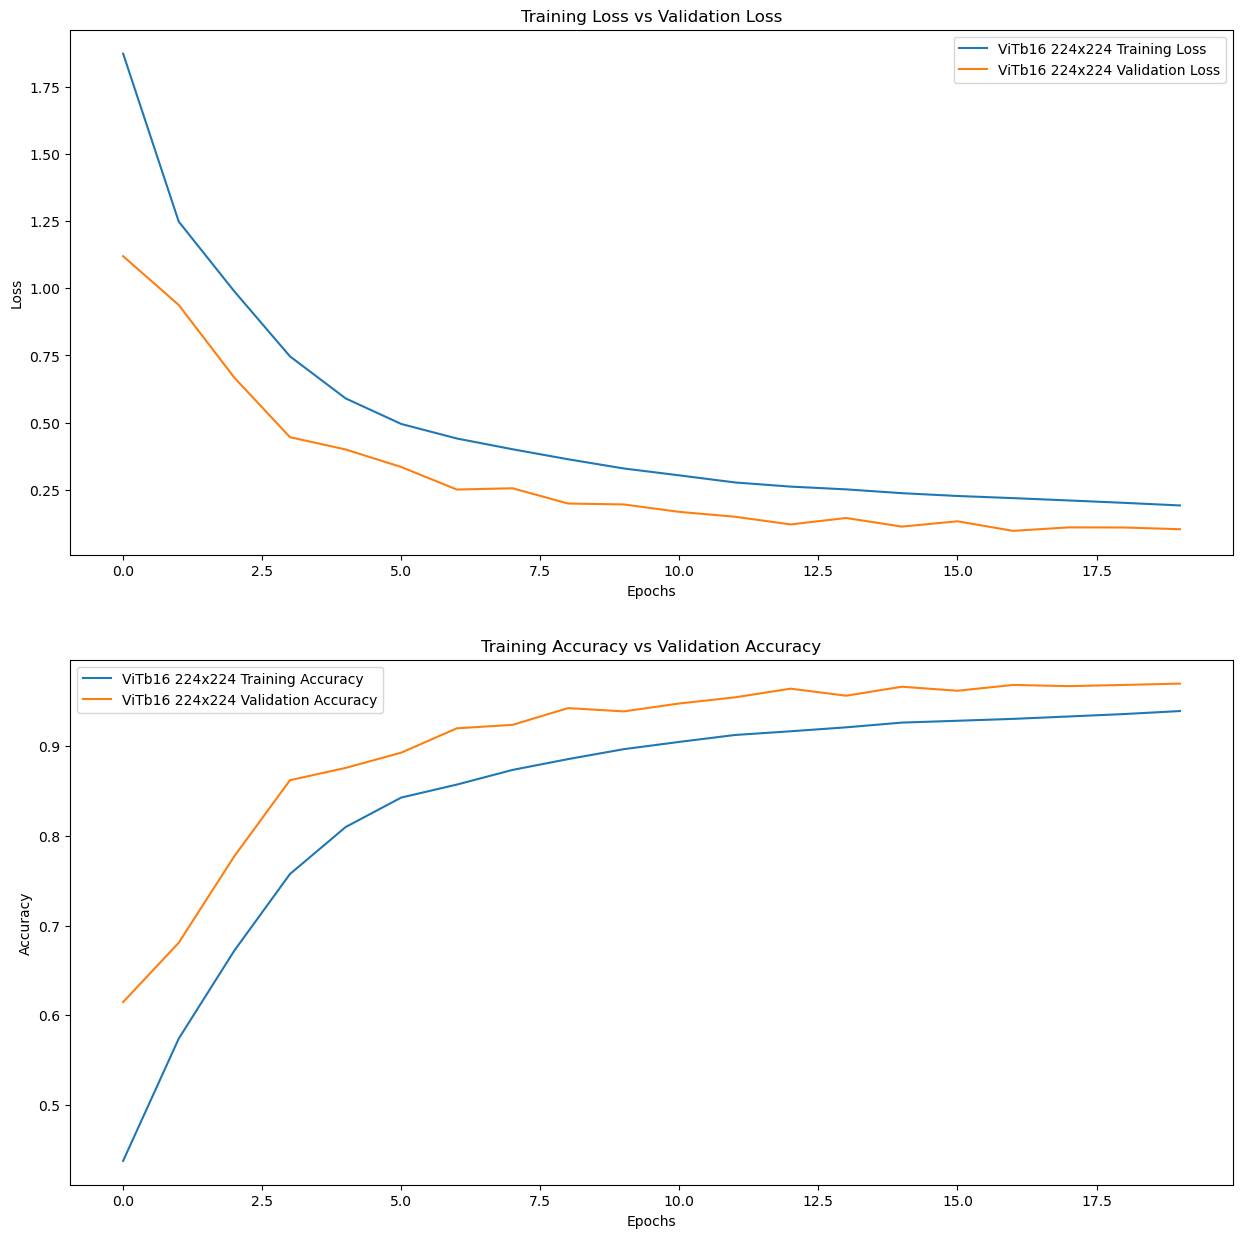

In [15]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])

axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['ViTb16 224x224 Training Loss', 'ViTb16 224x224 Validation Loss'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['ViTb16 224x224 Training Accuracy', 'ViTb16 224x224 Validation Accuracy'])

313/313 [==============================] - 54s 165ms/step
label precision recall F1
    0     0.984  0.993  0.988
    1     0.945  0.999  0.971
    2     0.972  0.945  0.958
    3     0.974  0.951  0.962
    4     0.969  0.958  0.964
    5     0.909  0.978  0.942
    6     0.964  0.961  0.963
    7     0.914  0.966  0.939
    8     0.996  0.912  0.952
    9     0.970  0.920  0.944
precision total: 0.959608188593078
recall total: 0.958281361139911
F1 total: 0.9583848790678658
Confusion matrix, without normalization
[[ 973    1    0    1    1    1    2    1    0    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   3   16  975    7    0    0    0   29    1    1]
 [   0    5    1  961    3   20    1   18    1    0]
 [   0    7    5    1  941    3    6   10    1    8]
 [   1    2    0    2    4  872    5    6    0    0]
 [   0    3    1    0    3   17  921    5    0    8]
 [   1   13   14    1    3    0    1  993    0    2]
 [   9   10    7   12    7   12   13    6  888   10]
 [ 

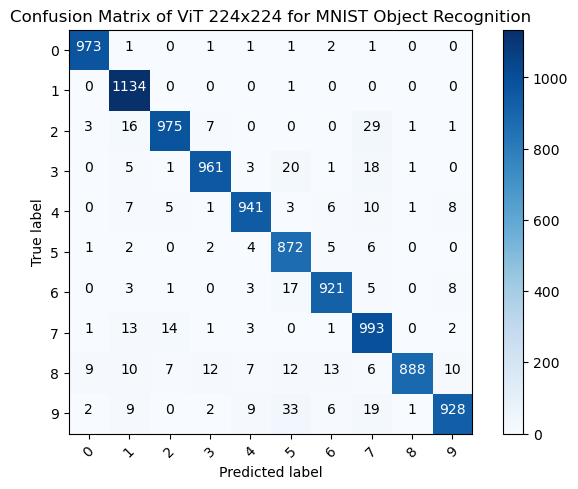

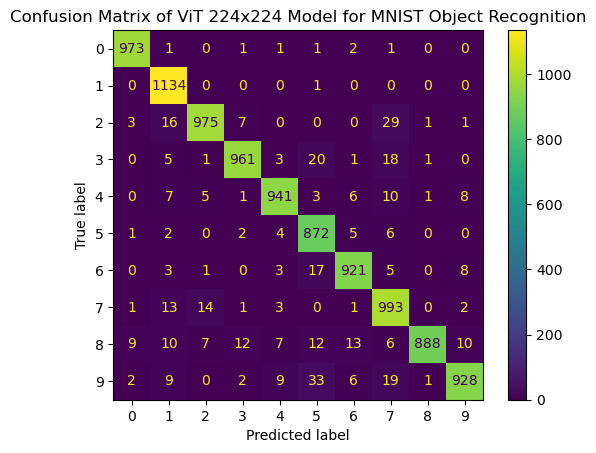

313/313 [==============================] - 52s 165ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:155: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


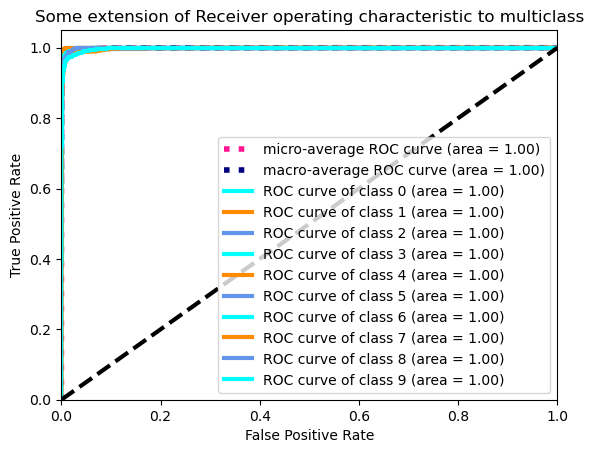

In [16]:
import itertools
from tensorflow.keras import layers, models,Input, Model
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, auc, roc_curve
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, auc, roc_curve

## Load the Trained Model
CNN_model = models.load_model("ViT_224x224.tf")

## Make Prediction for the test datasets
predictions=CNN_model.predict(x_test)

## Convert from one-hot(2D) encoding to 1D
predictions=np.argmax(predictions, axis=1)
labels=np.argmax(y_test, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=labels, predictions=predictions)
confusion_matrix_original = confusion_matrix
confusion_matrix = confusion_matrix.numpy()

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return float(sum_of_precisions / rows)

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return float(sum_of_recalls / columns)

def F1(label,confusion_matrix):      
    F1=2*(precision(label,confusion_matrix)*(recall(label,confusion_matrix)))/(precision(label,confusion_matrix)+recall(label,confusion_matrix))
    return F1

print("label precision recall F1")
for label in range(10):
    print(f"{label:5d} {precision(label, confusion_matrix):9.3f} {recall(label, confusion_matrix):6.3f} {F1(label,confusion_matrix):6.3f}")

def F1_macro_average(confusion_matrix):
    rows,columns = confusion_matrix.shape
    sum_of_F1=0
    for label in range(rows):
        sum_of_F1+=F1(label,confusion_matrix)        
    return float(sum_of_F1/columns)

print("precision total:", precision_macro_average(confusion_matrix))

print("recall total:", recall_macro_average(confusion_matrix))

print("F1 total:", F1_macro_average(confusion_matrix))

def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

cm_classes=['0','1','2','3','4','5','6','7','8','9']

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix of  ViT 224x224 for MNIST Object Recognition',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm=confusion_matrix,classes=cm_classes,title="Confusion Matrix of ViT 224x224 for MNIST Object Recognition",cmap=plt.cm.Blues)

import sklearn
from sklearn import metrics
predictions=CNN_model.predict(x_test)

predictions=CNN_model.predict(x_test)
##predictions_list=[]
##predictions_list=[[1 if predictions[j][i]>0.5 else 0 for i in range(10)] for j in range(10000)]
predictions=np.argmax(predictions, axis=1)
labels=np.argmax(y_test, axis=1)
report = sklearn.metrics.classification_report(labels, predictions, digits=3)
print(report)

# Compute ROC curve and ROC area for each class
### roc_curve and auc is only support for one-hot encoding 
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=cm_classes)
disp.plot()
plt.title("Confusion Matrix of ViT 224x224 Model for MNIST Object Recognition")
plt.show()

from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
fpr = dict()
tpr = dict()
predictions=CNN_model.predict(x_test)
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i]
                                  , predictions[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes=10
lw=3
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()